<a href="https://colab.research.google.com/github/Haris247hrw/yfinance/blob/main/Data_Science_Air_New_Zealand_Finance_(BASIC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong> Risk Management for Air New Zealand </strong>

## Basic

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define tickers
ticker_stock = 'AIR.NZ'
ticker_index = '^GSPC'  # Market index

# Fetch historical market data
data_stock = yf.download(ticker_stock, start='2020-01-01', end='2024-01-01')
data_index = yf.download(ticker_index, start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


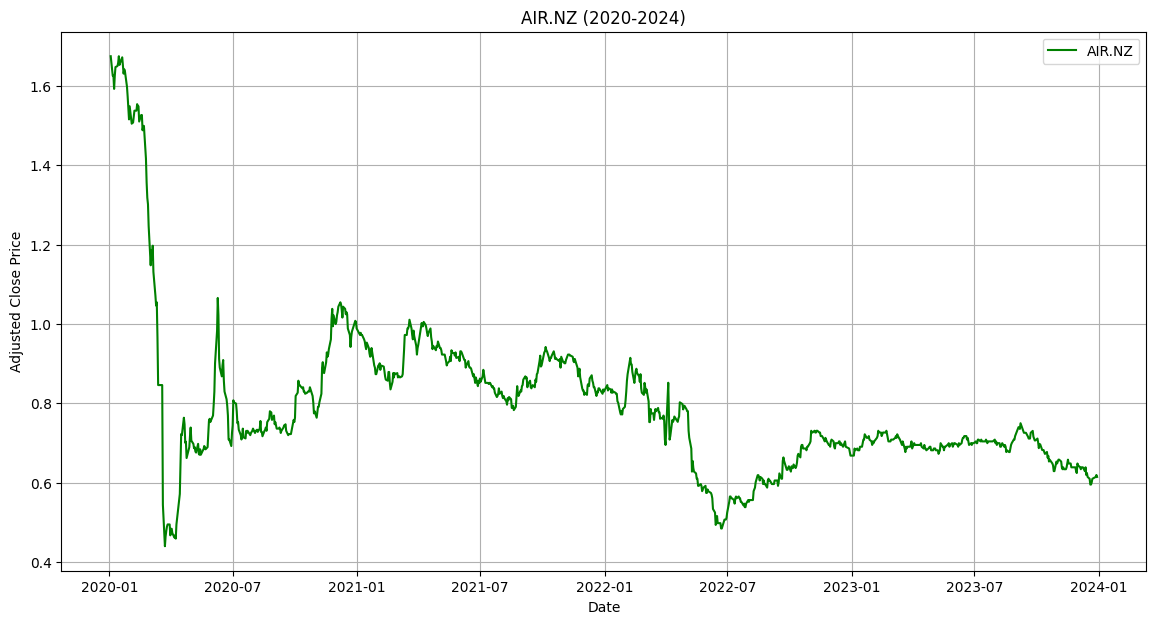

In [ ]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data_stock['Adj Close'], label=ticker_stock, color = 'green')
# Add title and labels
plt.title(f'{ticker_stock} (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

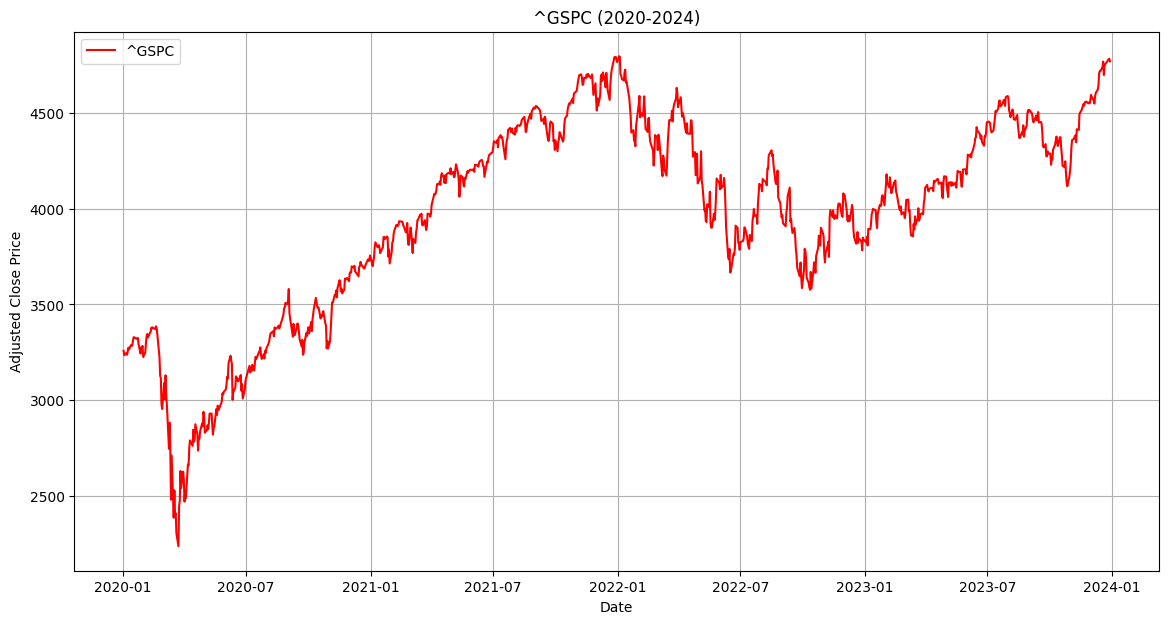

In [ ]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data_index['Adj Close'], label=ticker_index, color = 'red')

# Add title and labels
plt.title(f'{ticker_index} (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

### Risk Management Caluclaation

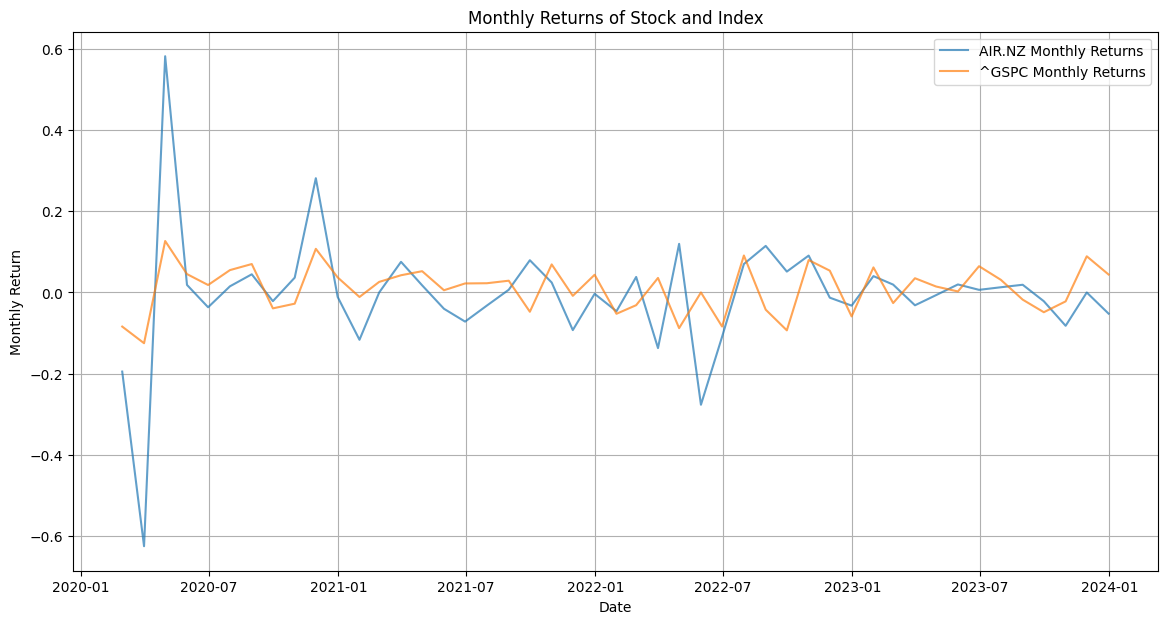

Average Monthly Return for AIR.NZ: -0.57%
Average Monthly Return for ^GSPC: 1.00%


In [ ]:
# Resample to monthly data
data_stock_monthly = data_stock['Adj Close'].resample('M').ffill()
data_index_monthly = data_index['Adj Close'].resample('M').ffill()

# Calculate monthly returns
data_stock_returns = data_stock_monthly.pct_change()
data_index_returns = data_index_monthly.pct_change()

# Drop NA values
data_stock_returns.dropna(inplace=True)
data_index_returns.dropna(inplace=True)

# Plot the monthly return graph
plt.figure(figsize=(14, 7))
plt.plot(data_stock_returns.index, data_stock_returns, label=f'{ticker_stock} Monthly Returns', alpha=0.7)
plt.plot(data_index_returns.index, data_index_returns, label=f'{ticker_index} Monthly Returns', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.title('Monthly Returns of Stock and Index')
plt.legend()
plt.grid(True)
plt.show()

# Calculate average monthly return
average_monthly_return = data_stock_returns.mean()
average_monthly_return_index = data_index_returns.mean()

# Convert to percentage
average_monthly_return_percentage = average_monthly_return * 100
average_monthly_return_percentage_index = average_monthly_return_index * 100

print(f'Average Monthly Return for {ticker_stock}: {average_monthly_return_percentage:.2f}%')
print(f'Average Monthly Return for {ticker_index}: {average_monthly_return_percentage_index:.2f}%')

In [ ]:
# Calculate standard deviation of monthly returns
std_deviation = data_stock_returns.std()
std_deviation_index = data_index_returns.std()

# Convert to percentage
std_deviation_percentage = std_deviation * 100
std_deviation_percentage_index = std_deviation_index * 100

print(f'Standard Deviation of Monthly Returns for {ticker_stock}: {std_deviation_percentage:.2f}%')
print(f'Standard Deviation of Monthly Returns for {ticker_index}: {std_deviation_percentage_index:.2f}%')

Standard Deviation of Monthly Returns for AIR.NZ: 15.21%
Standard Deviation of Monthly Returns for ^GSPC: 5.74%


In [ ]:
# Calculate covariance and variance for beta
cov_matrix = np.cov(data_stock_returns, data_index_returns)
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

print(f'Beta of {ticker_stock} : {beta:.2f}')

Beta of AIR.NZ : 1.38


In [ ]:
# Define risk-free rate (e.g., 10-year government bond yield, adjust as needed)
risk_free_rate = 0.03 / 12  # Assume 3% annual risk-free rate, convert to monthly

# Calculate Treynor Ratio
treynor_ratio = (average_monthly_return - risk_free_rate) / beta

# Convert Treynor Ratio to percentage
treynor_ratio_percentage = treynor_ratio * 100

print(f'Treynor Ratio for {ticker_stock}: {treynor_ratio_percentage:.2f}%')

Treynor Ratio for AIR.NZ: -0.60%


In [ ]:
# Calculate VaR at 95% and 99% confidence levels
var_95 = data_stock_returns.quantile(0.05)
var_99 = data_stock_returns.quantile(0.01)

# Convert to percentage
var_95_percentage = var_95 * 100
var_99_percentage = var_99 * 100

print(f'Value at Risk (VaR) at 95% confidence level for {ticker_stock}: {var_95_percentage:.2f}%')
print(f'Value at Risk (VaR) at 99% confidence level for {ticker_stock}: {var_99_percentage:.2f}%')

Value at Risk (VaR) at 95% confidence level for AIR.NZ: -17.77%
Value at Risk (VaR) at 99% confidence level for AIR.NZ: -46.51%


## ARIMA (AutoRegressive Integrated Moving Average)

ARIMA (AutoRegressive Integrated Moving Average) is a statistical model used for forecasting time series data by combining autoregression, differencing, and moving averages

- p: The number of lag observations included in the model (autoregressive part).
- d: The number of times that the raw observations are differenced (integrated part).
- q: The size of the moving average window (moving average part).

p-value: 5.069147045665387e-05
The series is stationary
p-value: 1.4853646889747279e-12
The series is stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

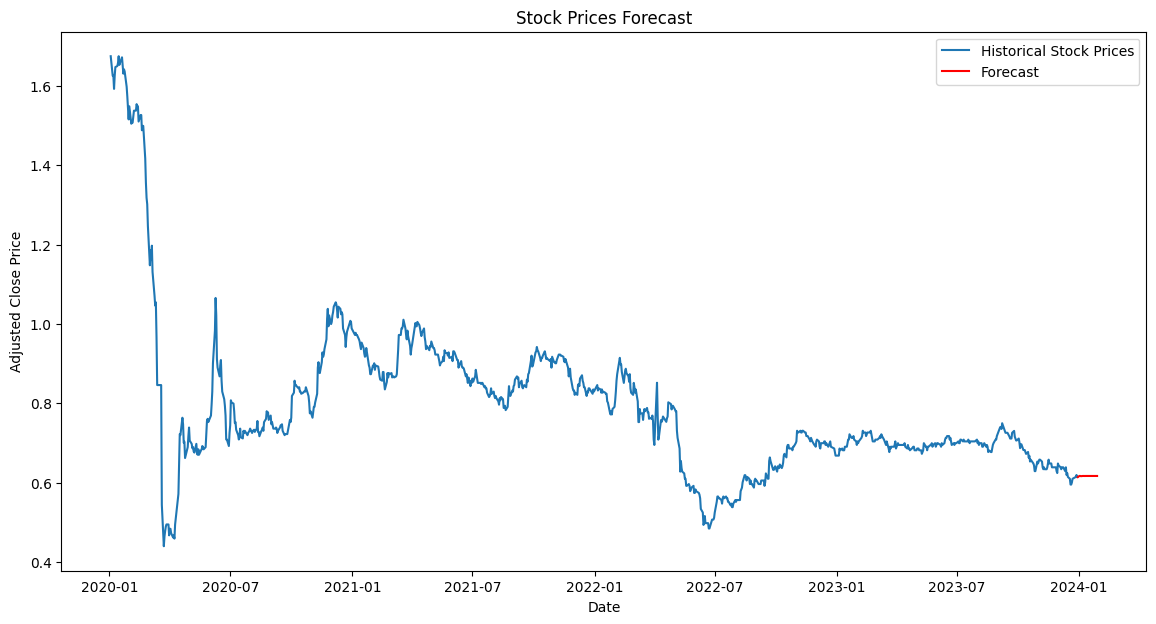

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Extract the adjusted close price
stock_prices = data_stock['Adj Close']
index_prices = data_index['Adj Close']

# Check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print('The series is stationary')
    else:
        print('The series is not stationary')

# Check stationarity for stock prices
check_stationarity(stock_prices)

# Differencing if the series is not stationary
stock_prices_diff = stock_prices.diff().dropna()

# Check stationarity again
check_stationarity(stock_prices_diff)

# Fit ARIMA model
model = ARIMA(stock_prices, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()


# Plot the forecast
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(14, 7))
plt.plot(stock_prices, label='Historical Stock Prices')
plt.plot(pd.date_range(start=stock_prices.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Stock Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

## Recurrent Neural Network (RNN)

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Fetch Historical market data
ticker_stock = 'AIR.NZ'
ticker_index = '^GSPC'

data_stock = yf.download(ticker_stock, start='2020-01-01', end='2024-01-01')
data_index = yf.download(ticker_index, start='2020-01-01', end='2024-01-01')

# Focus on the 'Close' price
data_stock = data_stock[['Close']]
data_index = data_index[['Close']]

# Handling Missing data
data_stock.dropna(inplace=True)
data_index.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_stock_scaled = scaler.fit_transform(data_stock)
data_index_scaled = scaler.fit_transform(data_index)

# Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Use stock data as an example
seq_length = 60
X_stock, y_stock = create_sequences(data_stock_scaled, seq_length)

# Reshape data for RNN input
X_stock = np.reshape(X_stock, (X_stock.shape[0], X_stock.shape[1], 1))

# Split the data into training and testing sets
split = int(0.8 * len(X_stock))
X_train_stock, X_test_stock = X_stock[:split], X_stock[split:]
y_train_stock, y_test_stock = y_stock[:split], y_stock[split:]

# Build the RNN model
model_stock = Sequential()
model_stock.add(SimpleRNN(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model_stock.add(SimpleRNN(50, activation='relu'))
model_stock.add(Dense(1))

model_stock.compile(optimizer='adam', loss='mse')

# Train the Model
stock_history = model_stock.fit(X_train_stock, y_train_stock, epochs=20, batch_size=32, validation_data=(X_test_stock, y_test_stock))

# Predict on the test set
predicted_stock_price = model_stock.predict(X_test_stock)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<ipython-input-3-9df59af9ba4a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_index.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0581 - val_loss: 7.9669e-04
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0010 - val_loss: 1.2615e-04
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.8774e-04 - val_loss: 1.2141e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.3168e-04 - val_loss: 3.2219e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 5.9632e-04 - val_loss: 1.6904e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 5.6178e-04 - val_loss: 1.7528e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 5.1041e-04 - val_loss: 7.5577e-05
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 5.0287e-04 - val_loss: 1.0985e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.4450e-04 - val_loss: 7.3906e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.0092e-04 - val_loss: 1.9557e-04
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 7.2327e-04 - val_

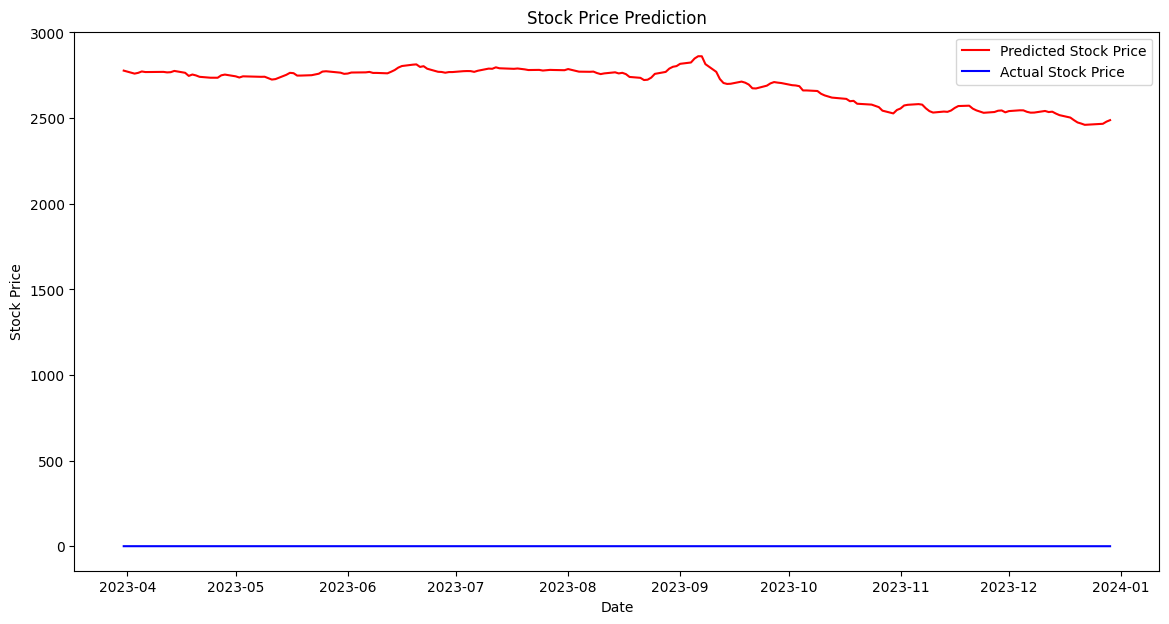

In [7]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(data_stock.index[seq_length+split:], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.plot(data_stock.index[seq_length+split:], data_stock['Close'][seq_length+split:], color='blue', label='Actual Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

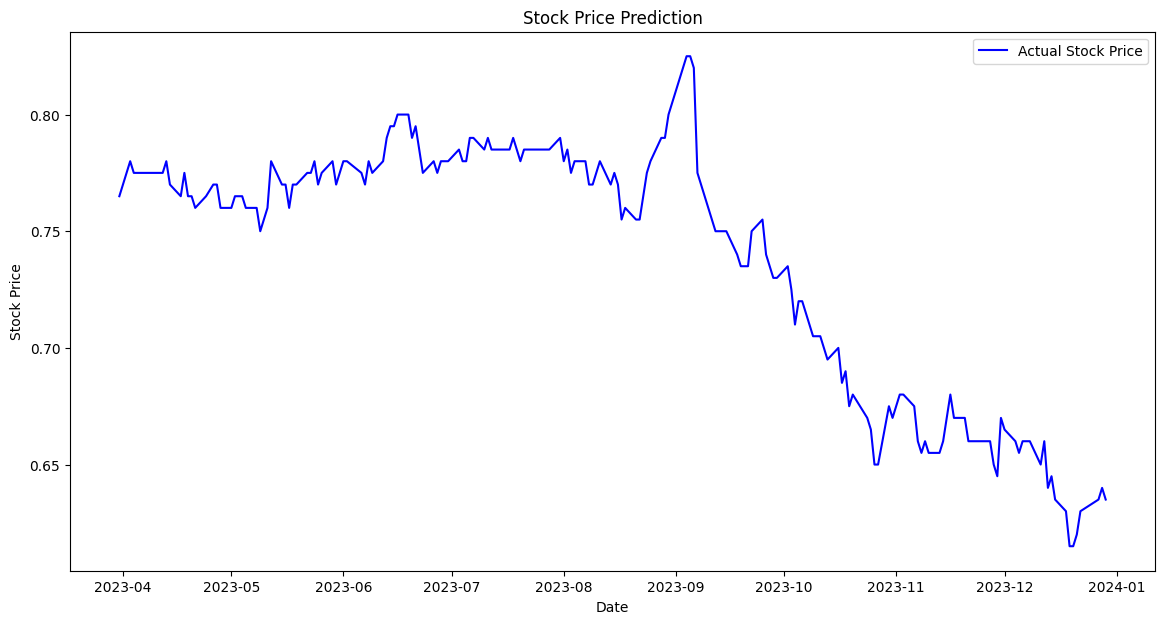

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data_stock.index[seq_length+split:], data_stock['Close'][seq_length+split:], color='blue', label='Actual Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

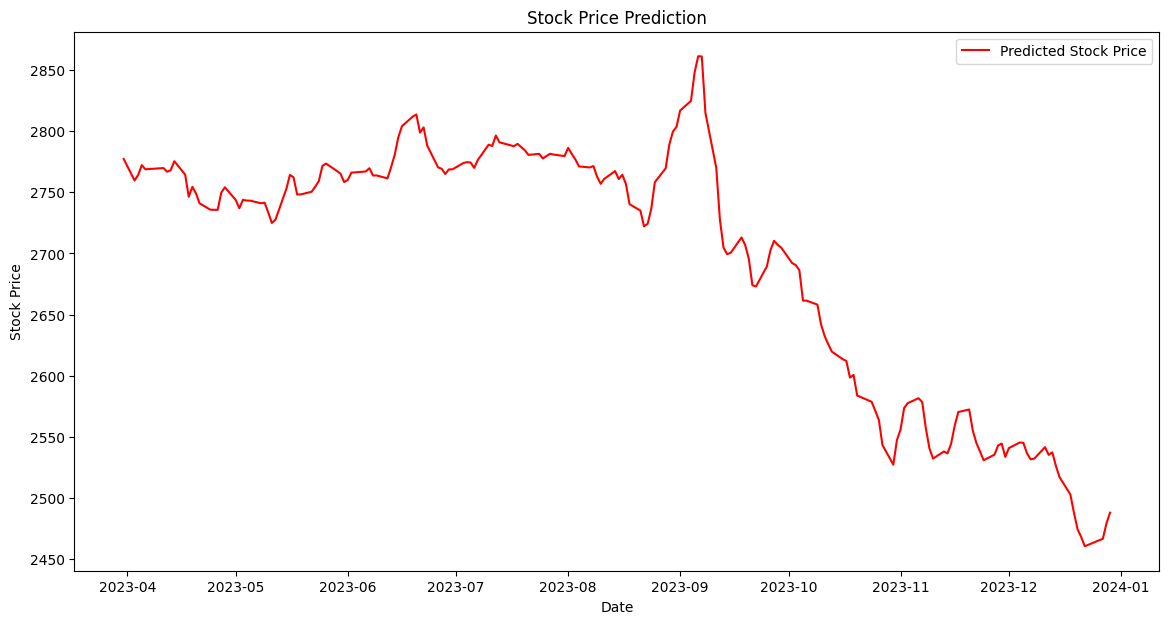

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data_stock.index[seq_length+split:], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()